# Spaceship Titanic

In [1]:
# Import the required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
# Import the training dataset
df = pd.read_csv('train.csv')
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [5]:
#Checking all the Null values in the dataset

df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# make a chart to see the people in home planet(true,false), cryosleep(true,false), 
# destination (all destination place)), VIP(true,false), homeplanet

# fillna in homeplanet, cryosleep, Age(mean)

# Use Random Forest Classifier

# https://www.kaggle.com/code/aaron95629/spaceship-titanic


# Data Visulization and Transformation

#### HomePlanet

In [7]:
# Cateorical Data so filling the missing value with 'Missing' 
missing_HP = df['HomePlanet'].fillna('Missing')

In [8]:
missing_HP.value_counts()


HomePlanet
Earth      4602
Europa     2131
Mars       1759
Missing     201
Name: count, dtype: int64

<BarContainer object of 4 artists>

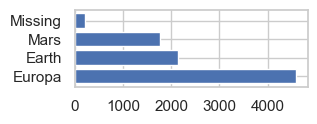

In [34]:
fig=plt.figure(figsize=(3,1))
plt.barh(missing_HP.unique(),missing_HP.value_counts())

<Axes: xlabel='HomePlanet', ylabel='count'>

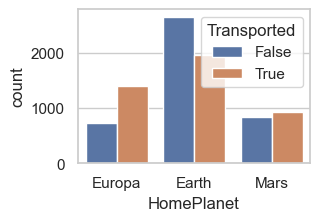

In [10]:
fig=plt.figure(figsize=(3,2))
sns.countplot(df, x="HomePlanet", hue="Transported")

#### CryoSleep

In [11]:
missing_cyro = df['CryoSleep'].fillna('Missing')
display(missing_cyro.value_counts())

CryoSleep
False      5439
True       3037
Missing     217
Name: count, dtype: int64

In [12]:
#plt.barh(missing_cyro.unique(),missing_cyro.value_counts())

In [13]:
# Finding the percentage of the all the values in Cyrosleep

false_value_cyro = round(missing_cyro.value_counts()[0] / len(df['CryoSleep']) * 100,4)
true_value_cyro = round(missing_cyro.value_counts()[1] / len(df['CryoSleep']) * 100,4)
missing_value_cyro = round(missing_cyro.value_counts()[2] / len(df['CryoSleep']) * 100,4)
print(f' True % {true_value_cyro}')
print(f' False % {false_value_cyro}')
print(f' Missing % {missing_value_cyro}')

 True % 34.9362
 False % 62.5676
 Missing % 2.4963


<Axes: xlabel='CryoSleep', ylabel='count'>

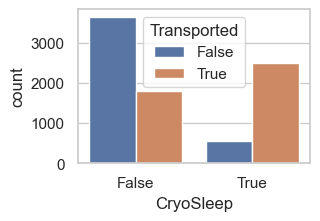

In [14]:
fig=plt.figure(figsize=(3,2))
sns.countplot(df, x="CryoSleep", hue="Transported")

# Cabin

In [15]:
df['Cabin'].isna().sum()

199

In [16]:
# Filling the missing value of Cabin in 3 ways splitting by'/'

df['Cabin'].fillna('Missing/Missing/Missing', inplace=True)

In [17]:
# Splitting the data of Cabin in dec/num/side

df['Cabin_Deck'] = df['Cabin'].apply(  lambda x: str(x).split('/')[0])
df['Cabin_Number']= df['Cabin'].apply(  lambda x: str(x).split('/')[1])
df['Cabin_Side'] = df['Cabin'].apply(  lambda x: str(x).split('/')[2])
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported Cabin_Deck Cabin_Number Cabin_Side  
0        False          B            0          P  
1         True          F            0          S  
2        False          A            0          S  
3        False          A            0          S  
4         True          F            1          S